<b>combine the results of experiments 1.0 and 2.0 to detect and identify faces</b>

In [57]:
import os
import cv2
import json
import spacy
import dateutil.parser
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

In [9]:
nlp = spacy.load('en')

In [88]:
caption_file = '../data/raw/labeledCaptions.mat'
labels = loadmat(caption_file)
details = labels['captions']
captions= {}

In [4]:
def convert_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [25]:
cap = str(details[:,5])
print(cap)
doc = nlp(cap)
for ent in doc.ents:
    print(ent.label_, ent.text)

[ array([[ (array([ 'Aicha El Ouafi, mother of <IN> Zacarias Moussaoui </IN>, listens to questions from reporters after attending a hearing for her son at the Federal Courthouse complex in Alexandria, Virginia, July 25, 2002. Moussaoui withdrew his guilty plea to charges of conspiracy in connection with the Sept. 11 attacks on the United States during the hearing, just one hour after saying he would plead guilty to some counts. REUTERS/Win McNamee'],
      dtype='<U430'), array(['2002/07/25/img_491.jpg'],
      dtype='<U22'), array([[array(['Zacarias Moussaoui'],
      dtype='<U18')]], dtype=object))]],
      dtype=[('caption', 'O'), ('picname', 'O'), ('names', 'O')])]
WORK_OF_ART Aicha El Ouafi
PERSON Zacarias Moussaoui
ORG the Federal Courthouse
GPE Alexandria
GPE Virginia
DATE July 25, 2002
PERSON Moussaoui
DATE Sept. 11
GPE the United States
TIME just one hour
PERSON Moussaoui


In [ ]:
captions={}
for i in range(np.shape(details)[1]):
    cap = str(details[:,i])
    doc = nlp(str(cap))
    people = []
    dates=[]
    for ent in doc.ents:
        if ent.label_=='PERSON' and len(ent.text) > 2:
            name = ent.text
            if name[0]=="'" or name[0]=="\"":
                name=name[1:]
            if name[-1]=="'" or name[-1]=="\"":
                name=name[-1]
            if not name.startswith("array") and len(name)>2:
                people.append(name)
        '''if ent.label_=='DATE':
            try:
                date_formatted = dateutil.parser.parse(ent.text)
                if date_formatted.year in [2001, 2002, 2003]:
                    dates.append(date_formatted)
                    captions[i] = (np.unique(people), dates)
            except:
                pass'''
    img_name = cap.split('.jpg')[0].split('array([\'20')[1]
    if img_name[:2]=='03'and img_name[3:5] in ['01','02','03']:
        captions[str(img_name)] = np.unique(people)
            

In [323]:
captions

{'03/01/13/img_358': array(['> Carolyn Dawn Johnson', 'Reed Saxon'],
       dtype='<U22'),
 '03/01/15/img_244': array(['Christie Whitman', 'Mike Derer', 'Whitman'],
       dtype='<U16'),
 '03/01/17/img_467': array(['Kidman', 'Meryl Streep', 'Moore', 'Nicole Kidman', 'Streep'],
       dtype='<U13'),
 '03/01/18/img_324': array([], dtype=float64),
 '03/01/18/img_950': array(['/OUT>. Bush', 'George W', 'Kevin Lamarque', 'Nancy Pelosi',
        'Pelosi'],
       dtype='<U14'),
 '03/01/19/img_592': array(['Actor', 'Downey', 'Robert Downey', 'Steve Marcus'],
       dtype='<U13'),
 '03/01/19/img_962': array(['Chavez', 'Hugo Chavez'],
       dtype='<U11'),
 '03/01/21/img_192': array(['Bush', 'John Snow', 'Kevin Lamarque', "Paul O'Neill", 'Snow'],
       dtype='<U14'),
 '03/01/22/img_356': array(['Kevin Lamarque', 'Tom Ridge'],
       dtype='<U14'),
 '03/01/22/img_399': array(['David Ortiz', 'Jeremy Giambi'],
       dtype='<U13'),
 '03/01/22/img_976': array(['George Robertson', 'Robertson'],
   

In [155]:
accum_imgs = []
for dirpath,_,filename in os.walk('../data/raw'):
     if any(f.endswith('.jpg') for f in filename):
        for f in filename:
             accum_imgs.append(os.path.join(dirpath, f))

In [156]:
len(accum_imgs)

5267

In [157]:
haarCascade = '../../opencv-3.3.1/data/haarcascades/haarcascade_frontalface_alt.xml'
faceDetector = cv2.CascadeClassifier(haarCascade)

In [325]:
for key, value in captions.items():
    people = value
    img_path = "../data/raw/%s.jpg"%key[3:]
    img = cv2.imread(img_path)
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceDetector.detectMultiScale(img_grey, 1.3, 5)
    print("No. faces detected: %d "%(len(faces)))
    '''for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)'''
    ground_truth_names =  [name for name in value if str(" ") in name] 
    print("Ground truth no. faces: %d" %len(ground_truth_names))
    print(ground_truth_names)
    print(len(ground_truth_names)==len(faces))
    print()
    

No. faces detected: 1 
Ground truth no. faces: 2
['Robert Downey', 'Steve Marcus']
False

No. faces detected: 0 
Ground truth no. faces: 3
['John Snow', 'Kevin Lamarque', "Paul O'Neill"]
False

No. faces detected: 1 
Ground truth no. faces: 1
['Mark Lennihan']
True

No. faces detected: 1 
Ground truth no. faces: 1
['Henri Proglio']
True

No. faces detected: 0 
Ground truth no. faces: 3
['Gerhard Schroeder', 'Jacques Chirac', 'Markus Schreiber']
False

No. faces detected: 0 
Ground truth no. faces: 2
['Larry Downing', 'Richard Gephardt']
False

No. faces detected: 1 
Ground truth no. faces: 2
['George W', 'Larry Downing']
False

No. faces detected: 1 
Ground truth no. faces: 2
['> Ann Roth', 'Meryl Streep']
False

No. faces detected: 1 
Ground truth no. faces: 2
['Andrew Wallace', 'Imad Khadduri']
False

No. faces detected: 0 
Ground truth no. faces: 2
['Luca Bruno', 'Peter Gabriel']
False

No. faces detected: 1 
Ground truth no. faces: 0
[]
False

No. faces detected: 0 
Ground truth no

People in photo (ground truth):  ['Chris Klein', 'Bryan Dunseth', 'Dunseth']


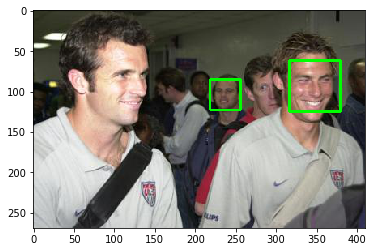

In [293]:
plt.imshow(convert_to_rgb(img))
print("People in photo (ground truth): ", captions["%s"%key] )

In [311]:
[name for name in value if str(" ") in name]

['Chris Klein', 'Bryan Dunseth']

In [234]:
captions[str('03/01/19/img_592')]

['Actor', 'Robert Downey', 'Downey', 'Steve Marcus', 'Downey']

In [260]:
key in captions

False